In [7]:
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # assuming you want to use 20% of the data for validation

train_generator = train_datagen.flow_from_directory(
    'D:/SELF/ML/aksara-detection/code/findingbali/dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    'D:/SELF/ML/aksara-detection/code/findingbali/dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Load the VGG16 model but exclude the top layer (which is the classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add your own layers
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(55, activation='softmax')(x)  # replace 55 with your actual number of classes

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30,
    verbose=1)  # set verbose to 1 to show the training progress and validation results


Found 4031 images belonging to 55 classes.
Found 982 images belonging to 55 classes.
Epoch 1/10
125/125 [==============================] - 13s 98ms/step - loss: 2.3032 - accuracy: 0.4326 - val_loss: 1.1794 - val_accuracy: 0.7115
Epoch 2/10
125/125 [==============================] - 12s 95ms/step - loss: 0.8014 - accuracy: 0.7802 - val_loss: 0.6531 - val_accuracy: 0.7979
Epoch 3/10
125/125 [==============================] - 12s 97ms/step - loss: 0.4606 - accuracy: 0.8650 - val_loss: 0.4603 - val_accuracy: 0.8427
Epoch 4/10
125/125 [==============================] - 12s 97ms/step - loss: 0.3369 - accuracy: 0.8985 - val_loss: 0.4494 - val_accuracy: 0.8448
Epoch 5/10
125/125 [==============================] - 12s 95ms/step - loss: 0.2635 - accuracy: 0.9225 - val_loss: 0.3734 - val_accuracy: 0.8573
Epoch 6/10
125/125 [==============================] - 12s 95ms/step - loss: 0.2086 - accuracy: 0.9357 - val_loss: 0.3420 - val_accuracy: 0.8687
Epoch 7/10
125/125 [==============================]

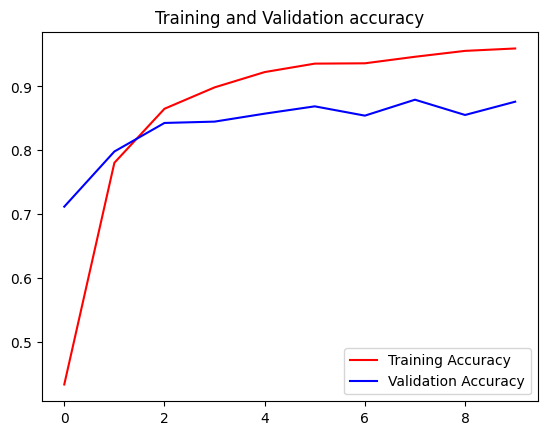

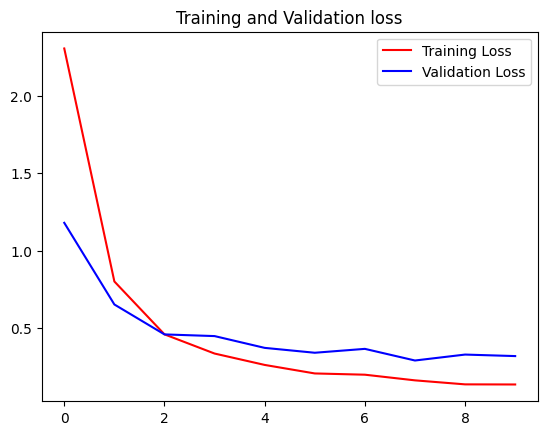

In [8]:
%matplotlib inline

import matplotlib.image as mping
import matplotlib.pyplot as plt 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc = 'best')
plt.show()

In [9]:
# Define the path to save the model
model_path = "D:/SELF/ML/aksara-detection/code/findingbali/model/modeltransfer.h5"

# Save the model
model.save(model_path)

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model("D:/SELF/ML/aksara-detection/code/findingbali/model/modeltransfer.h5")

# Function to classify the input image
def classify_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    class_index = np.argmax(prediction)
    confidence = prediction[0][class_index]

    return class_index, confidence

# Update the labels dictionary with class mappings
labels = {
    0: 'Adeg-Adeg',
    1: 'Ba',
    2: 'Bisah',
    3: 'Ca',
    4: 'Cecek',
    5: 'Da',
    6: 'Delapan',
    7: 'Dua',
    8: 'Empat',
    9: 'Enam',
    10: 'Ga',
    11: 'Gantungan Ba',
    12: 'Gantungan Ca',
    13: 'Gantungan Da',
    14: 'Gantungan Ga',
    15: 'Gantungan Ha',
    16: 'Gantungan Ja',
    17: 'Gantungan Ka',
    18: 'Gantungan La',
    19: 'Gantungan Ma',
    20: 'Gantungan Na',
    21: 'Gantungan Nga',
    22: 'Gantungan Nya',
    23: 'Gantungan Pa',
    24: 'Gantungan Ra',
    25: 'Gantungan Sa',
    26: 'Gantungan Ta',
    27: 'Gantungan Wa',
    28: 'Gantungan Ya',
    29: 'Ha',
    30: 'Ja',
    31: 'Ka',
    32: 'La',
    33: 'Lima',
    34: 'Ma',
    35: 'Na',
    36: 'Nga',
    37: 'Nya',
    38: 'Pa',
    39: 'Pepet',
    40: 'Ra',
    41: 'Sa',
    42: 'Satu',
    43: 'Sembilan',
    44: 'Suku',
    45: 'Surang',
    46: 'Ta',
    47: 'Taleng',
    48: 'Taleng Tedong',
    49: 'Tedong',
    50: 'Tiga',
    51: 'Tujuh',
    52: 'Ulu',
    53: 'Wa',
    54: 'Ya'
}



In [12]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Cecek.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 1s 736ms/step
The photo belongs to class 'Cecek' with confidence 1.00


In [13]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Da.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 19ms/step
The photo belongs to class 'Gantungan Ja' with confidence 0.83


In [14]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Enam.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Enam' with confidence 0.83


In [15]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Gantungan Ka.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 18ms/step
The photo belongs to class 'Gantungan Ka' with confidence 0.87


In [16]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Gantungan Ta.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Gantungan Ja' with confidence 0.97


In [17]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Gantungan Ya.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Pa' with confidence 0.74


In [18]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ka.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 19ms/step
The photo belongs to class 'Na' with confidence 0.70


In [19]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ma.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 16ms/step
The photo belongs to class 'Lima' with confidence 0.85


In [20]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Na.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 18ms/step
The photo belongs to class 'Na' with confidence 0.94


In [21]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Pepet.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 17ms/step
The photo belongs to class 'Taleng' with confidence 0.55


In [22]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Suku.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 18ms/step
The photo belongs to class 'Suku' with confidence 1.00


In [23]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ta.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 18ms/step
The photo belongs to class 'Ma' with confidence 0.53


In [24]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ulu.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 16ms/step
The photo belongs to class 'Pepet' with confidence 0.34


In [25]:
# Choose a photo and classify it
photo_path = "D:/SELF/ML/aksara-detection/code/findingbali/testing/Ya.jpg"
class_index, confidence = classify_image(photo_path)

# Get the label for the predicted class
predicted_class = labels[class_index]

print(f"The photo belongs to class '{predicted_class}' with confidence {confidence:.2f}")

1/1 [==============================] - 0s 20ms/step
The photo belongs to class 'Ya' with confidence 0.37
